What are the most demanded skills for the top 3 most popular data roles?

Methodology


1.   Clean-up skill column
2.   Calculate skill count based on job_title_short
3.   Calculate skill percentage
4.   Plot final findings



In [6]:
import ast
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Loading Data
df= pd.read_csv("/data_jobs.csv")

In [8]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df_kenya= df[df["job_country"]=="Kenya"]


In [10]:
df_skills = df_kenya.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
1059,Navigation & Infrastructure Engineer,NaN
1705,"Data Analytics Program Manager, VisionFund Int...",tableau
2089,Data Scientist,go
2089,Data Scientist,python
2089,Data Scientist,aws
...,...,...
785115,Data Analyst.,python
785115,Data Analyst.,r
785115,Data Analyst.,excel
785115,Data Analyst.,tableau


In [11]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
150,excel,Data Analyst,190
601,sql,Data Analyst,182
455,python,Data Analyst,164
476,r,Data Analyst,164
462,python,Software Engineer,139
...,...,...,...
169,firestore,Machine Learning Engineer,1
521,sap,Senior Data Analyst,1
162,fastapi,Machine Learning Engineer,1
335,matlab,Senior Data Analyst,1


In [13]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Scientist', 'Software Engineer']

<ipython-input-15-de0bd21c8628>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,  x='skill_count', y='job_skills', ax=ax[i], palette='YlOrBr' )
<ipython-input-15-de0bd21c8628>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,  x='skill_count', y='job_skills', ax=ax[i], palette='YlOrBr' )
<ipython-input-15-de0bd21c8628>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot,  x='skill_count', y='job_skills', ax=ax[i], palette='YlOrBr' )


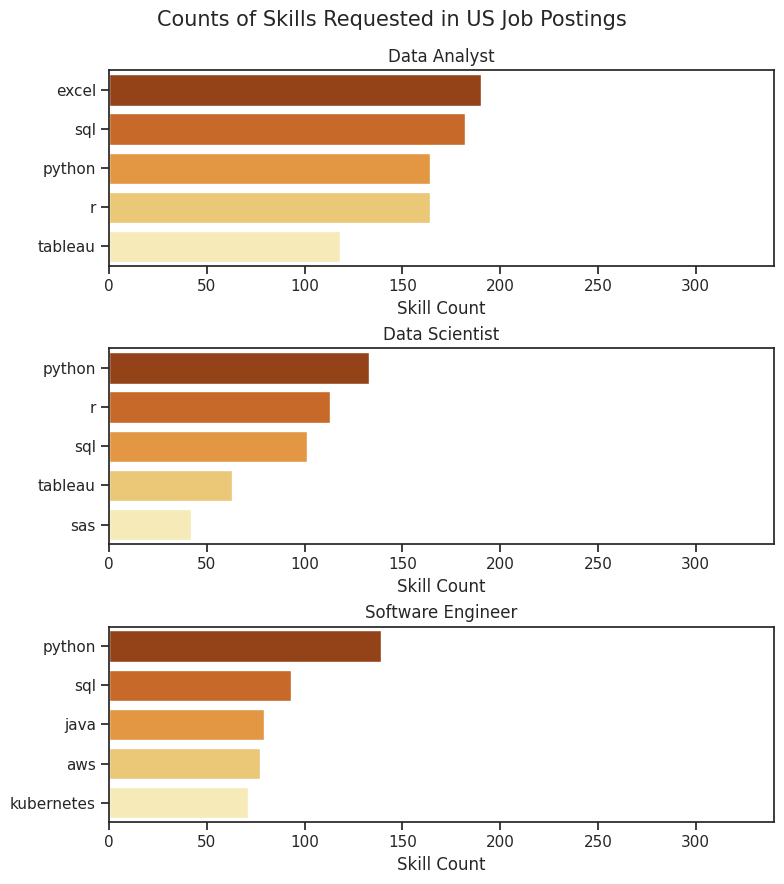

In [15]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 3* len(job_titles)))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]


    # Plot data
    sns.barplot(data=df_plot,  x='skill_count', y='job_skills', ax=ax[i], palette='YlOrBr' )

    # Formatting
    ax[i].set_title(job_title, fontsize=12)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Skill Count')
    ax[i].set_xlim(0, df_skills_count['skill_count'].max() + 150)  # Dynamic scale


# Set overall figure title
fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)  # Adjust spacing

# Show plot
plt.show()